important 変数を個々に定義する

In [12]:
SensorNum=2 # Sensor number
SampleNum=32 # Window Width
Overlap=0.5 # overlap
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'

In [13]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [14]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


In [15]:
DataName='sensor'+str(SensorNum)+'_'+PathAxis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [16]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [17]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [18]:
ArrayAxis = Axis.split(",")

In [19]:
ArrayAxis

['AccX', 'AccY', 'AccZ']

In [20]:
w=window.Window()
for a in ArrayAxis:
    w.SetData(a,dic[a])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
print wind.shape
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
(7960, 32, 3)


In [21]:
windoW.shape

(7960, 96)

**前回やった学習をもう１度やってみる**

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.0721 - val_loss: 0.0282
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0242 - val_loss: 0.0216
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 0.0202 - val_loss: 0.0191
Epoch 4/50
7960/7960 [==============================] - 2s - loss: 0.0183 - val_loss: 0.0173
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0165 - val_loss: 0.0157
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0150 - val_loss: 0.0143
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0137 - val_loss: 0.0131
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0125 - val_loss: 0.0120
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0116 - val_loss: 0.0111
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0108 - val_loss: 0.0105
Epoch 11/50
7960/7960

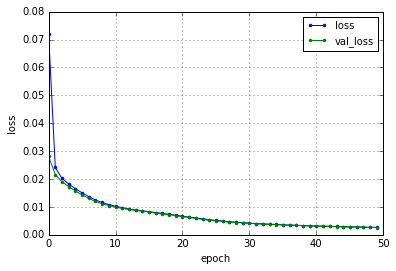

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0532 - val_loss: 0.0203
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0181 - val_loss: 0.0164
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0150 - val_loss: 0.0138
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0129 - val_loss: 0.0118
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0110 - val_loss: 0.0101
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0094 - val_loss: 0.0088
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0082 - val_loss: 0.0077
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0073 - val_loss: 0.0069
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0066 - val_loss: 0.0064
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0059 - val_loss: 0.0056
Epoch 11/50
7960/7960

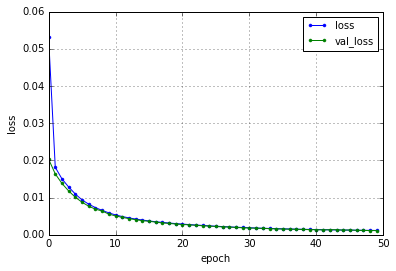

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0397 - val_loss: 0.0146
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0115 - val_loss: 0.0095
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0083 - val_loss: 0.0072
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0065 - val_loss: 0.0059
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0055 - val_loss: 0.0050
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0042 - val_loss: 0.0040
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0038 - val_loss: 0.0036
Epoch 9/50
7960/7960 [==============================] - 4s - loss: 0.0035 - val_loss: 0.0033
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0032 - val_loss: 0.0031
Epoch 11/50
7960/7960

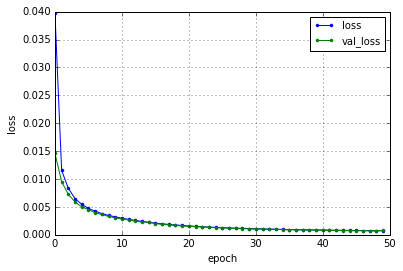

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0375 - val_loss: 0.0147
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0115 - val_loss: 0.0090
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0077 - val_loss: 0.0065
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0052
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0048 - val_loss: 0.0043
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0040 - val_loss: 0.0037
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0035 - val_loss: 0.0034
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0032 - val_loss: 0.0030
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0029 - val_loss: 0.0027
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0026 - val_loss: 0.0025
Epoch 11/50
7960/7960

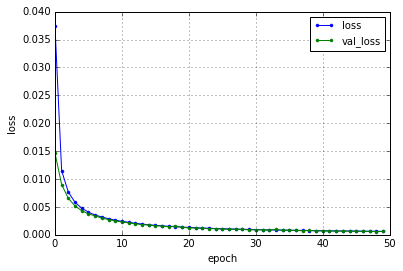

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0406 - val_loss: 0.0089
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0062 - val_loss: 0.0046
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 0.0039 - val_loss: 0.0034
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0031 - val_loss: 0.0027
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0025 - val_loss: 0.0022
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0021 - val_loss: 0.0019
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 0.0018 - val_loss: 0.0016
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0016 - val_loss: 0.0014
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
7960/7960

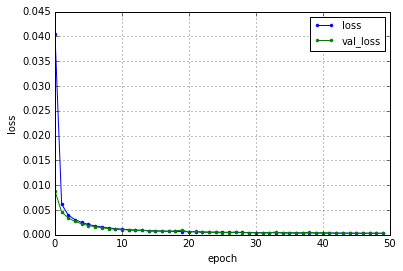

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0302 - val_loss: 0.0056
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0039 - val_loss: 0.0028
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 0.0024 - val_loss: 0.0020
Epoch 4/50
7960/7960 [==============================] - 4s - loss: 0.0017 - val_loss: 0.0015
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
7960/7960 [==============================] - 4s - loss: 0.0011 - val_loss: 9.8396e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 9.6430e-04 - val_loss: 8.5904e-04
Epoch 8/50
7960/7960 [==============================] - 4s - loss: 8.4208e-04 - val_loss: 7.7184e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 7.5569e-04 - val_loss: 6.6112e-04
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 6.8268e-04 - val_lo

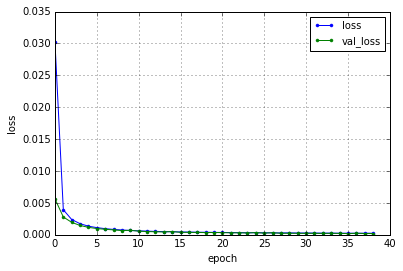

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0915 - val_loss: 0.0095
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0066 - val_loss: 0.0048
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 0.0042 - val_loss: 0.0038
Epoch 4/50
7960/7960 [==============================] - 4s - loss: 0.0034 - val_loss: 0.0031
Epoch 5/50
7960/7960 [==============================] - 4s - loss: 0.0030 - val_loss: 0.0034
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0027 - val_loss: 0.0025
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0024 - val_loss: 0.0023
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0022 - val_loss: 0.0021
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0020 - val_loss: 0.0019
Epoch 10/50
7960/7960 [==============================] - 4s - loss: 0.0018 - val_loss: 0.0017
Epoch 11/50
7960/7960

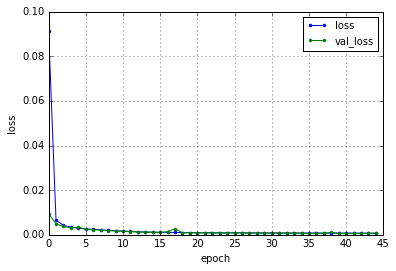

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0900 - val_loss: 0.0060
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0043 - val_loss: 0.0032
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0028 - val_loss: 0.0024
Epoch 4/50
7960/7960 [==============================] - 4s - loss: 0.0022 - val_loss: 0.0020
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0019 - val_loss: 0.0016
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0016 - val_loss: 0.0015
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0015 - val_loss: 0.0014
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0014 - val_loss: 0.0012
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0013 - val_loss: 0.0012
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
7960/7960

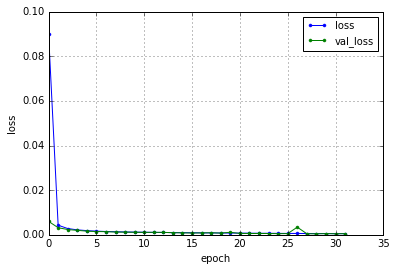

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0759 - val_loss: 0.0049
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0037 - val_loss: 0.0029
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 0.0024 - val_loss: 0.0020
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0019 - val_loss: 0.0016
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0015 - val_loss: 0.0013
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0013 - val_loss: 0.0011
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 0.0012 - val_loss: 9.9656e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0011 - val_loss: 0.0017
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 9.9603e-04 - val_loss: 8.3007e-04
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 9.1147e-04 - val_loss: 0.0010
Epoch

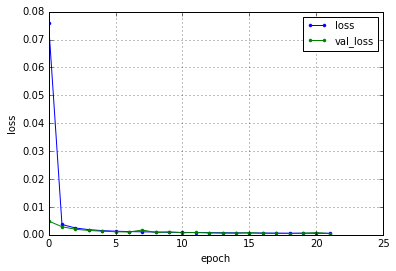

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0672 - val_loss: 0.0045
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0035 - val_loss: 0.0028
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0024 - val_loss: 0.0019
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0018 - val_loss: 0.0017
Epoch 5/50
7960/7960 [==============================] - 4s - loss: 0.0014 - val_loss: 0.0013
Epoch 6/50
7960/7960 [==============================] - 4s - loss: 0.0012 - val_loss: 0.0010
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 0.0011 - val_loss: 8.9695e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 9.5200e-04 - val_loss: 9.7871e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 8.6724e-04 - val_loss: 8.0141e-04
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 7.8955e-04 - val_loss: 6.85

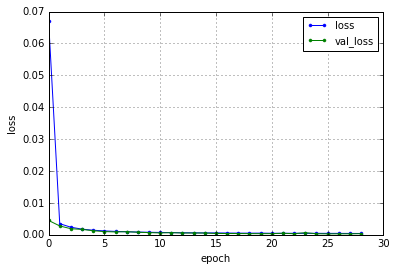

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0493 - val_loss: 0.0029
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0023 - val_loss: 0.0016
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 0.0015 - val_loss: 0.0013
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0012 - val_loss: 0.0016
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 9.7849e-04 - val_loss: 7.7387e-04
Epoch 6/50
7960/7960 [==============================] - 4s - loss: 8.5744e-04 - val_loss: 7.7995e-04
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 7.6820e-04 - val_loss: 5.6456e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 6.8066e-04 - val_loss: 6.9869e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 6.3923e-04 - val_loss: 4.6978e-04
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 5.9922e

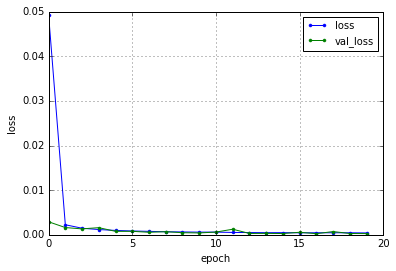

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0204 - val_loss: 0.0023
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0014 - val_loss: 9.9496e-04
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 8.9446e-04 - val_loss: 0.0015
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 6.7695e-04 - val_loss: 5.4199e-04
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 5.6632e-04 - val_loss: 3.3036e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 4.8173e-04 - val_loss: 2.5178e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 4.3030e-04 - val_loss: 4.1705e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 3.5424e-04 - val_loss: 2.4288e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 3.5373e-04 - val_loss: 5.1996e-04
Epoch 10/50
7960/7960 [==============================] - 4s

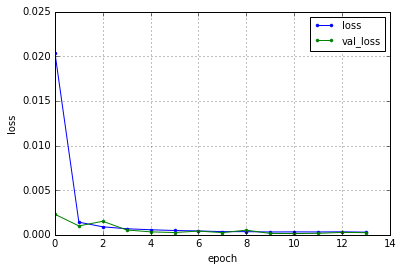

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0417 - val_loss: 0.0075
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0061 - val_loss: 0.0053
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0049 - val_loss: 0.0046
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0044 - val_loss: 0.0041
Epoch 5/50
7960/7960 [==============================] - 4s - loss: 0.0040 - val_loss: 0.0038
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0036 - val_loss: 0.0035
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0033 - val_loss: 0.0032
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0030 - val_loss: 0.0029
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0028 - val_loss: 0.0027
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0026 - val_loss: 0.0025
Epoch 11/50
7960/7960

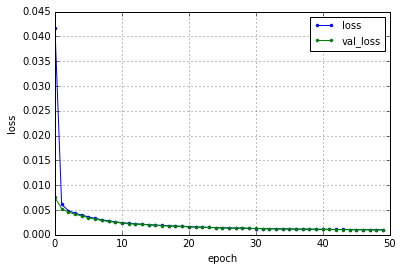

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.0237 - val_loss: 0.0056
Epoch 2/50
7960/7960 [==============================] - 2s - loss: 0.0048 - val_loss: 0.0043
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 0.0040 - val_loss: 0.0037
Epoch 4/50
7960/7960 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0032
Epoch 5/50
7960/7960 [==============================] - 2s - loss: 0.0029 - val_loss: 0.0027
Epoch 6/50
7960/7960 [==============================] - 2s - loss: 0.0025 - val_loss: 0.0024
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 0.0022 - val_loss: 0.0021
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 0.0020 - val_loss: 0.0019
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 10/50
7960/7960 [==============================] - 2s - loss: 0.0017 - val_loss: 0.0017
Epoch 11/50
7960/7960

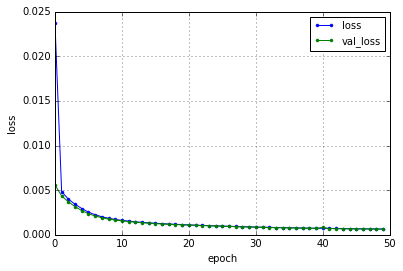

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 5s - loss: 0.0222 - val_loss: 0.0052
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0044 - val_loss: 0.0037
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 0.0033 - val_loss: 0.0029
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0026 - val_loss: 0.0024
Epoch 5/50
7960/7960 [==============================] - 4s - loss: 0.0022 - val_loss: 0.0020
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0019 - val_loss: 0.0017
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0017 - val_loss: 0.0016
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0015 - val_loss: 0.0014
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0013 - val_loss: 0.0013
Epoch 11/50
7960/7960

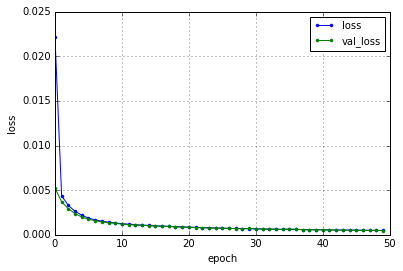

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0210 - val_loss: 0.0052
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0033 - val_loss: 0.0029
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0025 - val_loss: 0.0022
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0020 - val_loss: 0.0018
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0015 - val_loss: 0.0014
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
7960/7960

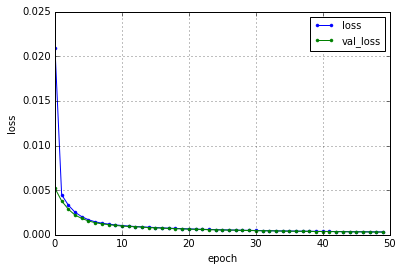

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0149 - val_loss: 0.0038
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0028 - val_loss: 0.0020
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0011 - val_loss: 9.7088e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 9.3795e-04 - val_loss: 8.6482e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 8.4202e-04 - val_loss: 7.8251e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 7.6536e-04 - val_loss: 7.1819e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 7.0192e-04 - val_loss: 7.2118e-04
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 6.5066e-04 

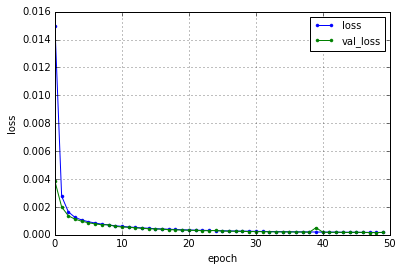

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.0085 - val_loss: 0.0022
Epoch 2/50
7960/7960 [==============================] - 2s - loss: 0.0017 - val_loss: 0.0012
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0011 - val_loss: 9.0274e-04
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 8.2423e-04 - val_loss: 7.1861e-04
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 6.8677e-04 - val_loss: 6.4094e-04
Epoch 6/50
7960/7960 [==============================] - 2s - loss: 5.7943e-04 - val_loss: 5.1459e-04
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 5.0064e-04 - val_loss: 4.5749e-04
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 4.4260e-04 - val_loss: 4.0348e-04
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 3.9702e-04 - val_loss: 3.5563e-04
Epoch 10/50
7960/7960 [==============================] - 3s - l

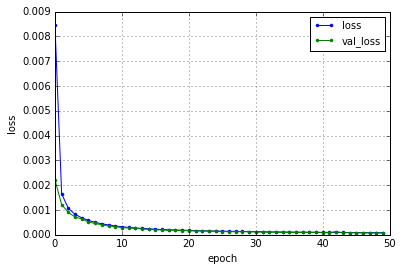

In [22]:
for AxisName,WindowNum in zip(ArrayAxis,range(3)):
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+AxisName
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=wind[:,:,WindowNum]
        window_train=wind[:,:,WindowNum]
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=wind.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5')

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5')

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5')

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()